<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: Experimental variogram </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Test Theoretical variogram 

- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 100

In [4]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import experimental, theoretical

# Experimental variogram 

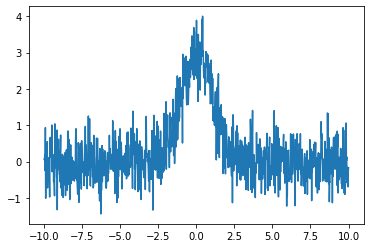

In [31]:
sc_initial = .5

x = np.linspace(-10, 10, 1000)
y = np.sin(2 * np.pi * x / 1) + sc_initial * np.random.randn(len(x))
y = 3 * np.exp(-x**2 / (2 * 1**2)) + sc_initial * np.random.randn(len(x))

i_points = np.arange(0, 250)

plt.plot(x, y)

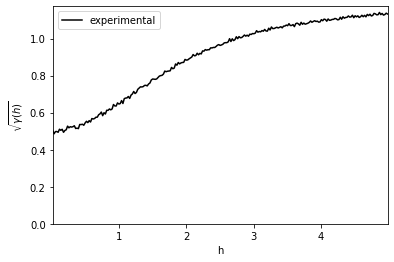

In [32]:
var_exp = experimental(x, y)
var_exp.compute(i_points)
var_exp.draw()


# Optimizacion por PSO

In [33]:
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.utils.plotters import plot_cost_history

In [34]:
""""
# Experimental
h_fitting = var_exp.h
f_fitting = var_exp.variogram
print(var_exp.h.shape)

var_theo = theoretical(h=h_fitting)
var_theo.gauss(0.05,1,2.5)
var_theo.draw()

plt.plot(var_exp.h, var_exp.variogram)
"""""

In [35]:
def cost_variogram(params, var_exp):
    var_theo = theoretical(h=var_exp.h)
    sc=params[0]
    A=params[1]
    lc = params[2]
    
    var_theo.gauss(sc, A, lc)
    
    std = np.sqrt(((var_exp.variogram - var_theo.variogram)**2).mean())
   
    return std

In [36]:
def opt_func(params):
    n_particles = params.shape[0]  # number of particles
    std = [cost_variogram(params[i,:],var_exp) for i in range(n_particles)]
    return std

In [37]:
num_transitions = 3
num_iters = 200  # suelen ser más
num_particles = 100  # suelen ser más


min_bound = np.array([0, 0, 0])
max_bound = np.array([1, 1, 5])
bounds = (min_bound, max_bound)


In [38]:
%%time
options = {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=num_particles, dimensions=num_transitions, options=options, bounds=bounds)

CPU times: user 9.8 ms, sys: 353 µs, total: 10.1 ms
Wall time: 8.95 ms


In [39]:
cost, pos_final = optimizer.optimize(opt_func,iters=num_iters)


2023-02-01 15:37:53,332 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0144
2023-02-01 15:37:55,074 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.014376281548888599, best pos: [0.5104 0.9998 2.3515]


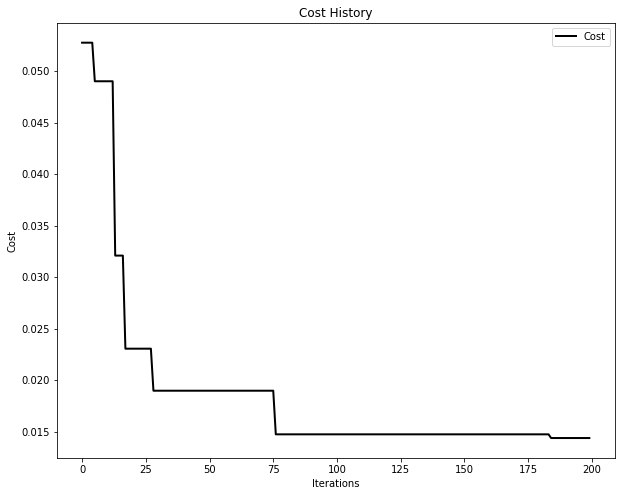

In [40]:
plot_cost_history(optimizer.cost_history)
plt.show()

In [41]:
print(pos_final)

[0.5104 0.9998 2.3515]


In [42]:
sc = pos_final[0]
A = pos_final[1]
lc = pos_final[2]

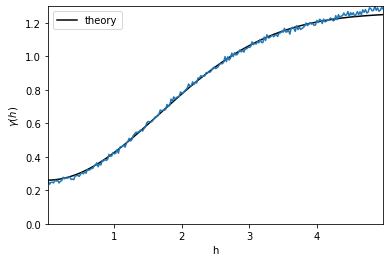

In [43]:
var_theo = theoretical(h=var_exp.h)
var_theo.gauss(sc, A, lc)
var_theo.draw(kind='normal')
plt.plot(var_exp.h, var_exp.variogram)